**Проект "Интернет-магазин компьютерных игр"**

*Цель проекта: выявить определяющие успешность игры закономерности. Найти потенциально популярный продукт, чтобы спланировать рекламные кампании. 

План исследования: на основании входных данных о играх, годами из релиза, платформах, количества продаж в разных регионах и оценок критиков и пользователей выделить портреты пользователей по регионам, посмотреть влияет ли рейтинг игр и их оценки на количество продаж в определенном регионе, найти 1-2 платформы, на которых потенциально можно выпускаь прибыльные игры и определить их жанр, рейтинг ESRB и в каком регионе рекламировать. Проверить гипотезы о равенстве средних рейтингов игр по разным платформам и жанрам*

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/datasets/games.csv')
df.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()
#year_of_release имеет тип данных float,нужно заменить на целочисленный
#User_Score нужно заменить на float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На первый взгляд все не так критично, -всего лишь изменить типы данных 2х столбцов

**Обработка данных**

In [4]:
#приведем к нижнему регистру
df=df.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})

In [5]:
df.isna().sum()
#видим зависимость, что количество пропущенных данных в рейтинге зависит от пропущенных данных в оценке пользователей

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
df['rating']=df['rating'].fillna('unknown')
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
#если избавиться от пропущенных значений в этих столбцах, то они не повлияют на конечные результаты + их количество небольшое
#чтобы привести к целочисленному типу данных по году, избавимся от пропущенных
df.isna().sum()


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Если избавиться от пропущенных значений  в оценках путем замены на среднее или медиану при таком большом количестве пропущенных , можно исказить данные, тк рейтинг может быть как высокий, так и низкий

In [7]:
df.query('rating=="unknown"')
#действительно, рейтинг неизвестен, когда неизвестны оценки, логично, но я хотела проверить гипотезу о том, что оценки неизвестны у более ранних игр- в данном случае сложно подтвердить эту гипотезу

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


In [8]:
print(df.query('rating=="unknown"')['year_of_release'].mean())
print(df['year_of_release'].mean())

2004.8834631515879
2006.4862563853078


In [9]:
df.query('user_score=="tbd"')
#можно просто заменить значения на пропущенные тк смысл в принципе тот же

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


as Google says that TBD means "to be definied" that can be considered that rating is still in process, but the result is not unknown as we see that in column rating there are "E" or "T" letter

In [10]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['critic_score'] = df['critic_score'].replace('tbd', np.NaN)

In [11]:
df['year_of_release']=df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')
df['critic_score'] = df['user_score'].astype('float') 
df.info()
#well!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7463 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [13]:
df['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

In [14]:
#Найдем общие продажи 
df['sales_total']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,8.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.3,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Как промежуточный итог можно сказать, что у нас есть данные по продажам игр в разных регионах (в млн), большая часть оценок пользователей и критиков отсутствет, сооветственно отсутствует и рейтинг игр, что существенно может исказить полученные результаты, и учитывая отсутсвие данных показателей мы не сможем полностью полагаться на результаты, проведение статистических тестов предположительно могут дать statistically insignificantt results**

In [16]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7463 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sales_total      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

**Исследовательский анализ данных**

<AxesSubplot:title={'center':'sales_per_year'}, xlabel='year_of_release', ylabel='sales_total'>

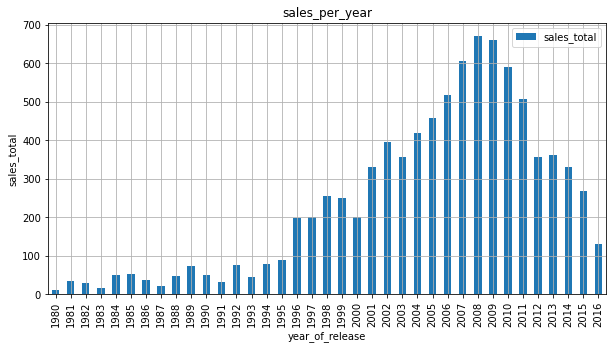

In [17]:
year_sales= df.pivot_table(index='year_of_release', values='sales_total',aggfunc='sum')
year_sales.plot(ylabel='sales_total',kind='bar',figsize=(10, 5),grid=True,title='sales_per_year')

Во-первых, можно заметить что игры сабильно выходили каждый год. С 1993 года продажи стабильно постепенно растут вплоть до 2007 года.Пик по продажам игр пришелся на 2008 год, также высокие значения показывают 2007, 2009-2010 года, потом идет тенденция к спаду популярности игр. Данные за все периоды для прогноза брать не стоит,ситуация сильно менялась, например с 1980 по 1995 продажи игр были слишком низки, популярность только-только набирала обороты

<AxesSubplot:xlabel='platform'>

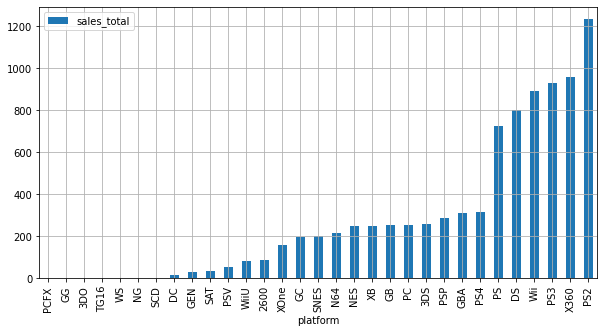

In [18]:
platform_sales= df.pivot_table(index='platform', values='sales_total',aggfunc='sum')
platform_sales.sort_values(by='sales_total').plot(kind='bar',figsize=(10, 5),grid=True)

Выделим наиболее прибыльные по продажам платформы и поместим в отдельный список 

In [19]:
list_of_platforms=['DS','PS','PS2','PS3','Wii','X360']
most_popular=df.query('platform in @list_of_platforms')
platform_year=most_popular.pivot_table(index='year_of_release',columns='platform',values='sales_total',aggfunc='sum')
platform_year

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


Если брать в расчет 6 самых популярных платформ, можно сказать что продажи по платформам менялись в зависимости от временных проомежутков: платформы то появлялись и набирали  популярность, то стремительно теряли и уходили с рынка. Посмотрим подробнее по каждой платформе:
1. DS есть данные по 1985 году, потом на 10 лет информации нет и снова рост популярности с 2004 по 2013 год
2. PS с 1994 по 2007 года
3. PS с 2000 по 2011 года
4. PS3 с 2006 года
5. Wii с 2006 года
6. X360 с 2005 года

в среднем каждая из платформ была популярна в течение 5 лет, а появлялись ои почти всегда каждый год, это мы можем увидеть по графику, так более репрезентативно

<AxesSubplot:xlabel='year_of_release'>

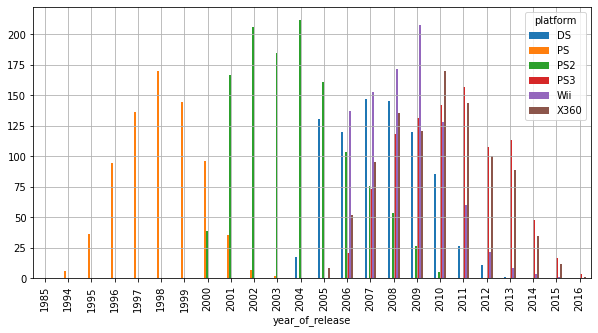

In [20]:
platform_year.plot(kind='bar',figsize=(10, 5),grid=True)

<AxesSubplot:xlabel='year_of_release'>

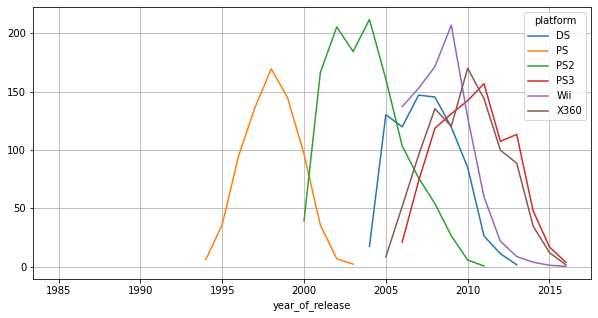

In [21]:
platform_year.plot(figsize=(10, 5),grid=True)

*Если мы допускаем, что жизненный цикл платформы около 5 лет, то, для прогноза на 2017 год возьмем данные с 2011 года по 2016. Так как предыдущие года уже не будут актуальны*

array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>,
        <AxesSubplot:title={'center':'eu_sales'}>],
       [<AxesSubplot:title={'center':'jp_sales'}>,
        <AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>],
       [<AxesSubplot:title={'center':'user_score'}>,
        <AxesSubplot:title={'center':'sales_total'}>, <AxesSubplot:>]],
      dtype=object)

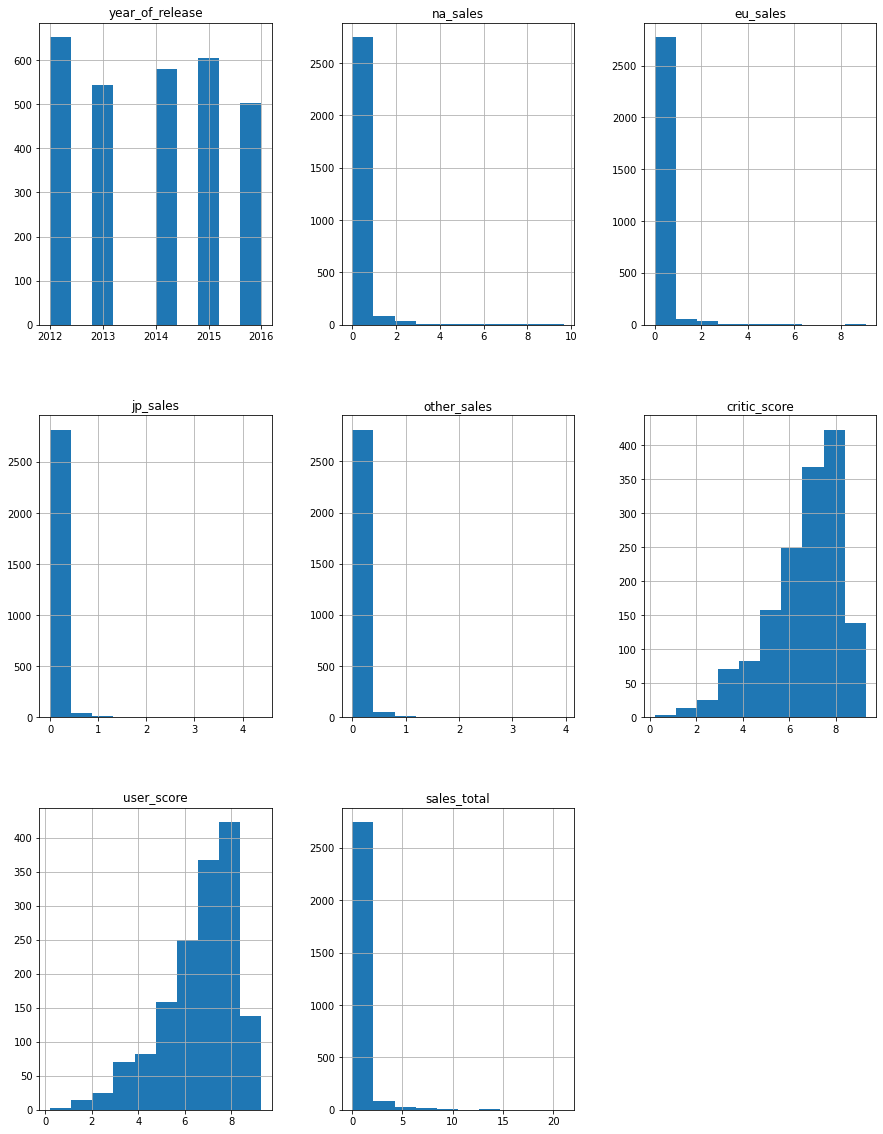

In [22]:
df_actual=df.query('year_of_release>2011')
df_actual.hist(figsize=(15, 20))

Видно, что продажи падают стремительно по всем регионам

<AxesSubplot:xlabel='year_of_release'>

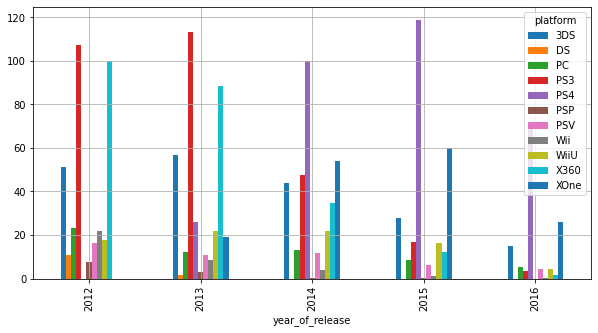

In [23]:
platform_year2=df_actual.pivot_table(index='year_of_release',columns='platform',values='sales_total',aggfunc='sum')
platform_year2.plot(kind='bar',figsize=(10, 5),grid=True)

Видим, что 11 платформ все еще осуществляют продажи, судя по fluctuations прадаж по платформам XOne, 3DS and Ps4, можно предположить что в 2017 на них придется значительная доля рынка. Остальные платформы показывают сильное снижение в продажах, есть верятность, что они пропадут в 2017

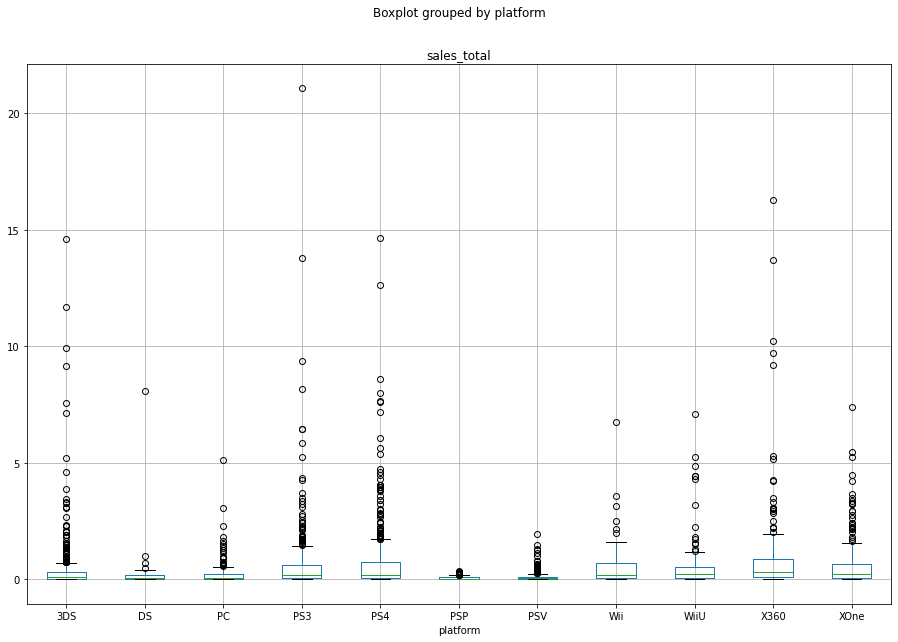

In [24]:
df_actual.boxplot(column='sales_total', by='platform',figsize=(15, 10))
plt.show()

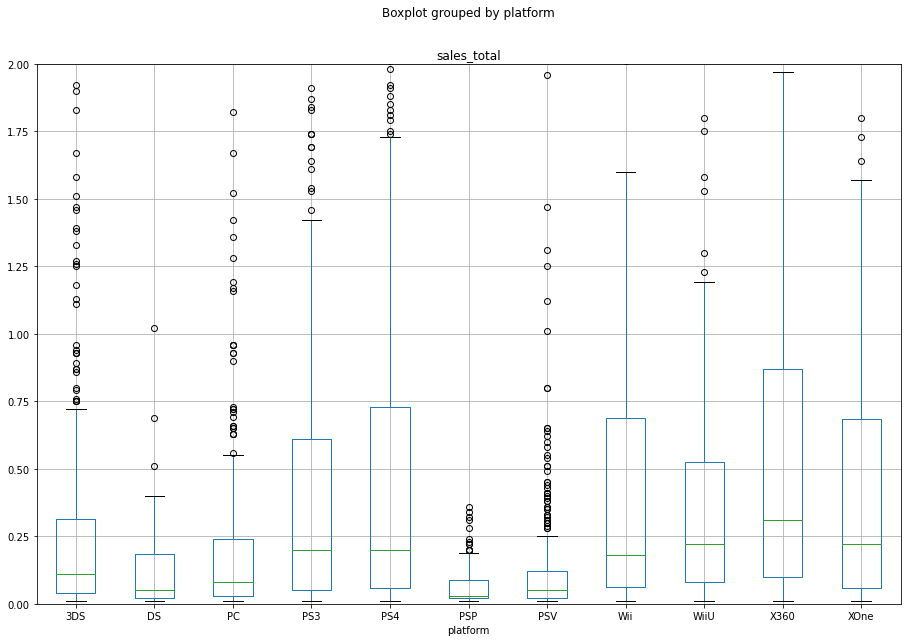

In [25]:
df_actual.boxplot(column='sales_total', by='platform',figsize=(15, 10)).set_ylim(0,2)
plt.show()

</font><font color='Blue'><b>График показывает большое количество выбросов в данных в среднем по общим продажам более 3 млн по каждой из платформ, учитывая предыдущие графики, которые показывают, что игры одномоментно набирают и теряют популярность, возможно эти выбросы удалять не стоит.
50% значений у большинства платформ лежат в пределах от 0.2 до 1 млн продаж. Медианные продажи большинства платформ находятся в промежутке от 0 до 0.3 млн. Медианы смещены ближе к первому квартилю.</b></font><br>

In [26]:
df.query('platform=="Wii"')['genre'].unique()

array(['Sports', 'Racing', 'Misc', 'Platform', 'Fighting', 'Action',
       'Shooter', 'Simulation', 'Puzzle', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Что у нас написано в задании: <br><b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. <br>Не учитывайте в работе данные за предыдущие годы.</b> <br>После определения актуального периода мы дальнейший анализ делаем только за этот период.</font>

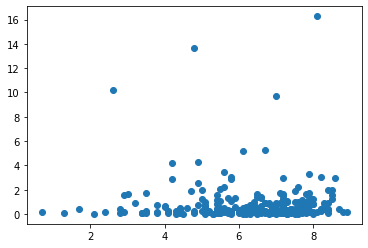

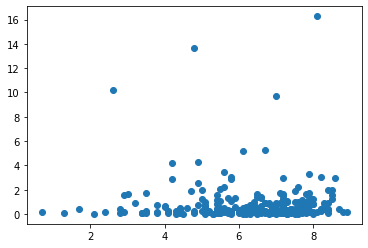

0.006163978646213326
0.006163978646213326


In [27]:
#на основании предыдущих графиков возьмем одну из популярных платформ: X360
x360data=df_actual.query('platform=="X360"')
plt.scatter(x=x360data['critic_score'], y=x360data['sales_total'])
plt.show()
plt.scatter(x=x360data['user_score'], y=x360data['sales_total'])
plt.show()
print(x360data['critic_score'].corr(x360data['sales_total']))
print(x360data['user_score'].corr(x360data['sales_total']))

*На основании таких низких положительных коэффициентов кореляции, я бы больше склонилась к ее отсутствию, чем наличию. *

In [28]:
df.query('year_of_release>2011')
#смотрим какие платформы остаются в актуальном периоде

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,8.2,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,8.1,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,5.3,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


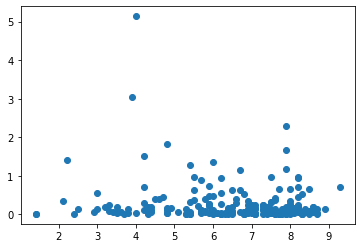

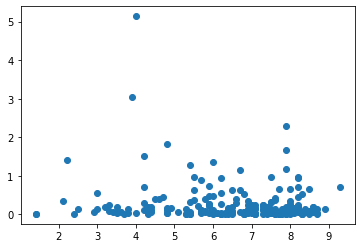

-0.12186747630735577
-0.12186747630735577


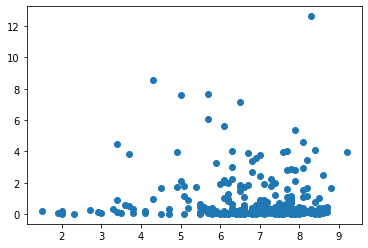

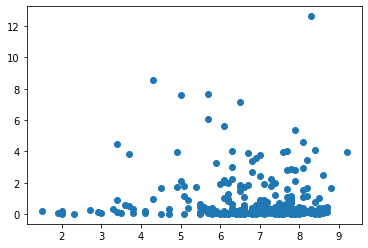

-0.031957110204556376
-0.031957110204556376


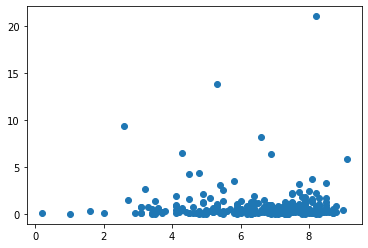

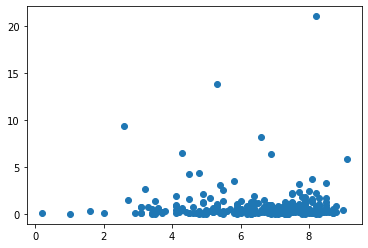

-0.005143522887113828
-0.005143522887113828


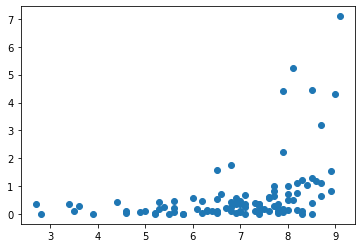

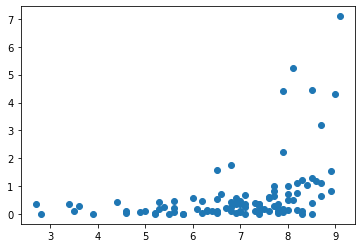

0.4002190202148617
0.4002190202148617


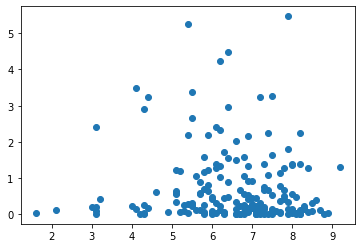

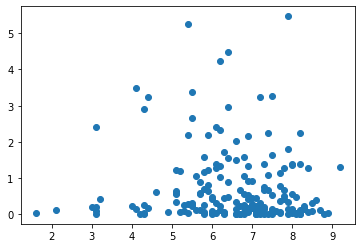

-0.06892505328279414
-0.06892505328279414


In [29]:
list_of_platforms=['PC','PS4','PS3','WiiU','XOne']
for i in list_of_platforms:
    plt.scatter(x=df_actual.query('platform==@i')['critic_score'], y=df_actual.query('platform==@i')['sales_total'])
    plt.show()
    plt.scatter(x=df_actual.query('platform==@i')['user_score'], y=df_actual.query('platform==@i')['sales_total'])
    plt.show()
    print(df_actual.query('platform==@i')['critic_score'].corr(df_actual.query('platform==@i')['sales_total']))
    print(df_actual.query('platform==@i')['user_score'].corr(df_actual.query('platform==@i')['sales_total']))

</font><font color='Blue'><b>если взять платформы, которые в актуальном периоде играют значительную роль (занимают существенную долю рынка), и посмотреть на коэффициенты корреляции, то можно заметить, что между оценками пользователей и критиков и общими продажами есть в большинстве случаев слабая отрицательная корреляция, что дает намек на то, что чем выше оценка, тем нижу продажи, но такой вывод ненадежен из-за величины коэффициента корреляции.Однако, у одной из платформ есть достаточно сильная положительная зависимость между продажами и оценкой. Мы не можем полностью исключить влияние оценок пользователей и критиков на продажи по платформам. <b></font><br>

<AxesSubplot:xlabel='genre'>

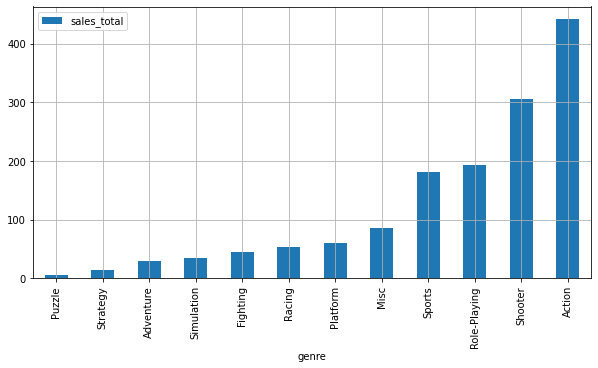

In [30]:
genre_sales=df_actual.pivot_table(values='sales_total',index='genre',aggfunc='sum')
genre_sales.sort_values(by='sales_total').plot(kind='bar',figsize=(10, 5),grid=True)

Выделются жанры как с самыми низкими продажами (Стратегии, приключения и головоломки), и с самыми высокими продажами (Экшн, Спорт, Боевики, Ролевые). Это можно объяснить качеством игр-к прримеру, игры в жанре экшн создать гораздо сложнее, чем те-же головоломки из-за большого количества стратегий и прочих фичей, они более продуманные, качественные, и соответственно спрос на них выше)

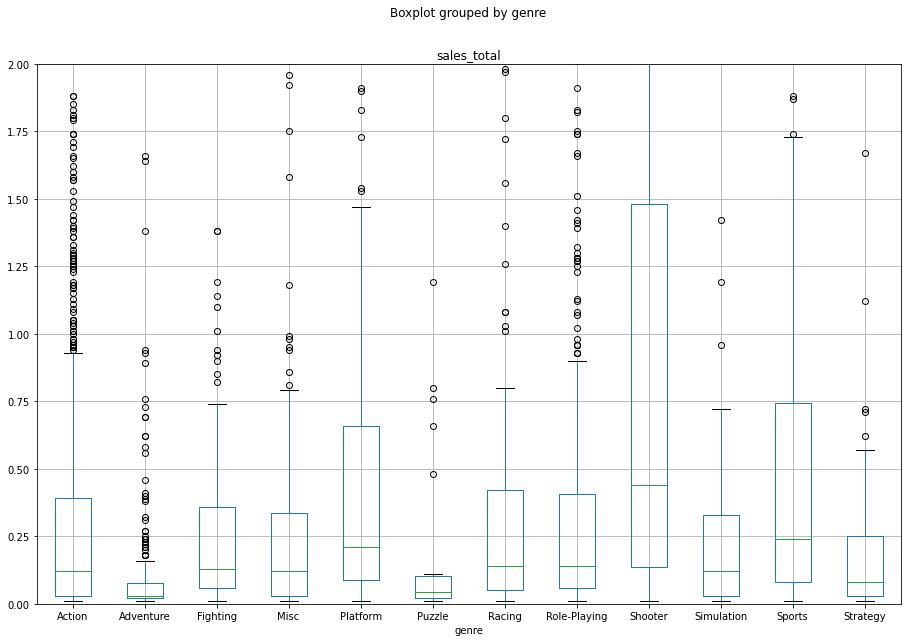

In [31]:
df_actual.boxplot(column='sales_total', by='genre',figsize=(15, 10)).set_ylim(0,2)
plt.show()

</font><font color='Blue'><b> *Если сравнивать медианные продажи по жанрам, тогда можно будет выделить жанры Shooter and Sports, где медианные продажи среди всех платформ были наивысшие (около 600 тыс), в то время как медианные продажи жанра Экшн сильно проигрывают данным жанрам.</b></font><br>

**Шаг 4: портрет пользователя каждого региона**

*Возьмем актуальныю дату для составления портретов по регионам*

array([<AxesSubplot:ylabel='eu_sales'>, <AxesSubplot:ylabel='jp_sales'>,
       <AxesSubplot:ylabel='na_sales'>], dtype=object)

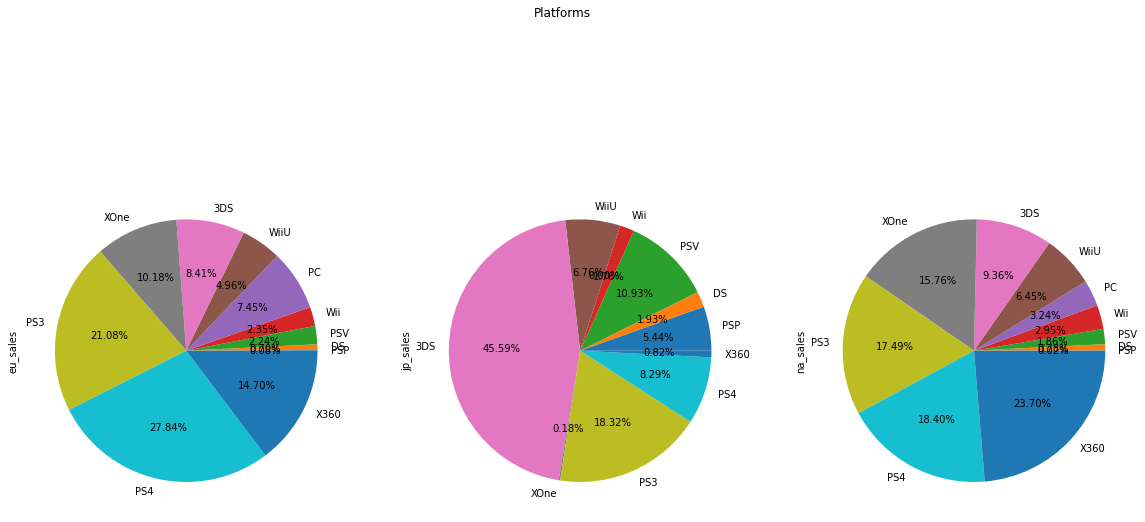

In [32]:
region_sales=df_actual.pivot_table(values=['na_sales','eu_sales','jp_sales'],index='platform',aggfunc='sum')
region_sales.sort_values(by=['na_sales','eu_sales','jp_sales']).plot(kind='pie',figsize=(20, 10),grid=True, subplots=True,legend=False,title="Platforms",autopct='%.2f%%')

</font><font color='Blue'><b>В Европе самые популярные:PS4,PS3, X360, Xone, 3DS
    
В Японии:PS4,PS3,3DS, PSV, WiiU
    
В Северной Америке:PS4,PS3,X360, XOne, 3DS </b></font><br>

array([<AxesSubplot:ylabel='eu_sales'>, <AxesSubplot:ylabel='jp_sales'>,
       <AxesSubplot:ylabel='na_sales'>], dtype=object)

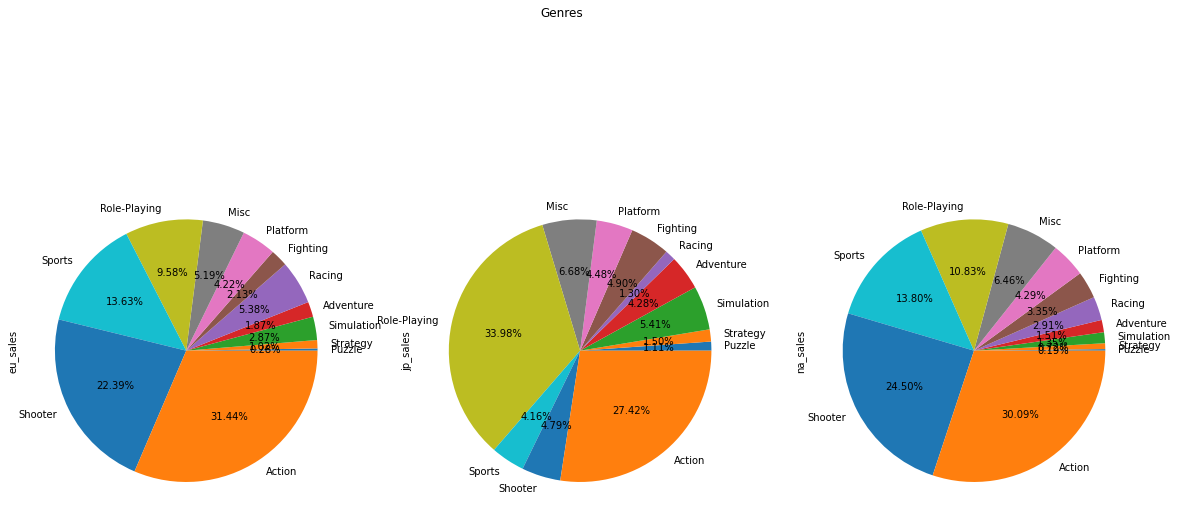

In [33]:
region_sales=df_actual.pivot_table(values=['na_sales','eu_sales','jp_sales'],index='genre',aggfunc='sum')
region_sales.sort_values(by=['na_sales','eu_sales','jp_sales']).plot(kind='pie',figsize=(20, 10),grid=True,subplots=True,legend=False,title="Genres",autopct='%.2f%%')

</font><font color='Blue'><b>В Европе самые популярные: Action, Shooter, Sports, Role-playing, Racing
    
В Японии: Action, Role-playing, - the most popular, and the rest of genres have particularly the same share (Simulation, Shooter, Fighting, Misc)
    
В Северной Америке:Action, Shooter, Sports, Role-playing, Misc

*выбор жанров скорее всего будет отражать местную куьтуру: если северная америка с европой еще +- имеют схожий менталитет людей, то Японцы сильно отличаются, отсюда и выбор Ролевых игр (самая большая доля) по сравнению с боевиками и тд.*Можно также провести связь с популярными жанрами в киноиндустрии, а как раз на ней потенциально основывается большинство игр </b></font><br>


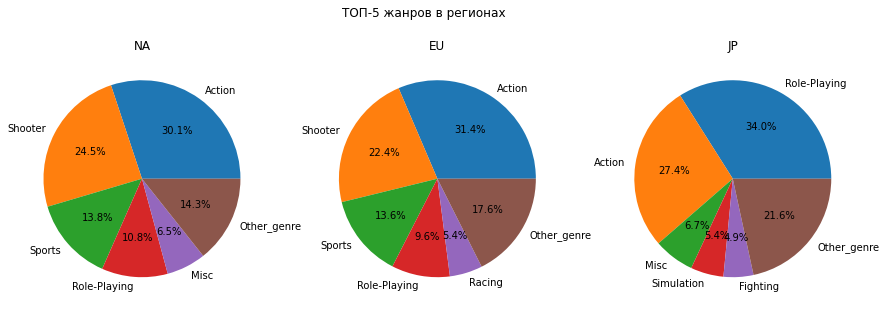

In [39]:

games_fresh = df_actual.copy()
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

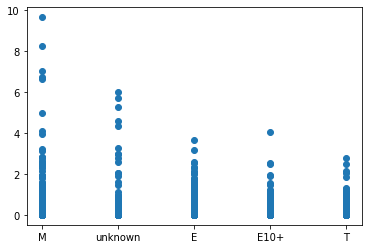

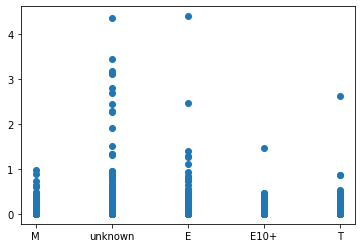

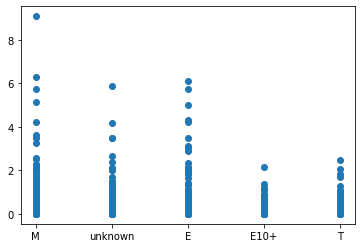

In [34]:
plt.scatter(df_actual['rating'], df_actual['na_sales'])
plt.show()
plt.scatter(df_actual['rating'], df_actual['jp_sales'])
plt.show()
plt.scatter(df_actual['rating'], df_actual['eu_sales'])
plt.show()

Если погрузиться в детали описания данного рейтинга, то 
1. «T» («Teen») — «Подросткам» 
2. «M» («Mature») — «Для взрослых» 
3. «E10+» («Everyone 10 and older») 
4. «E» («Everyone») — «Для всех» 
*я не верена, что подобрала подходящий способ поиска зависимости, я бы пошла через регрессию,однако данный график показывает, что в Северной Америке и Европе игры для взрослых более продаваемы, чем остальные категории, в то время как в Японии наиболее продаваемы игры для всех возрастных категорий.*

**Соответственно**
1. Европейцы: пользователи, выбирающие игры для взрослых (Это можно объяснить тем, что большинство игр-боевиков и в жанре экшн 18+), предпочитающие игры жанров Action, Shooter, Sports, Role-playing, Racing на платформах PS4,PS3, X360, Xone, 3DS
2. В Японии пользователи предпочтут Action, Role-playing (иры для всех) на плфтформах PS4,PS3,3DS, PSV, WiiU
3. В Северной Америке пользователи выберут игры для взрослых в жанре Action, Shooter, Sports, Role-playing, Misc, используя PS4,PS3,X360, XOne, 3DS

   

**Проверка гипотез**

•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

•	Средние пользовательские рейтинги жанров Action и Sports одинаковые.

(альтернативные гипотезы- рейтинги разные)


</font><font color='Blue'><b> Нам нужно проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, укажем equal_var = False, тк мы не можем считать равными дисперсии данных выборок. Для проверки будет использован T-test, тк исходные данные имеют приблизительно нормальное распределение, нулевые гипотезы сформулированы следующим образом: 

• Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

• Средние пользовательские рейтинги жанров Action и Sports одинаковые.

(альтернативные гипотезы- рейтинги разные)</b></font><br>

In [35]:
from scipy import stats as st
#возьмем стандартный уровень статистической значимости
alpha=0.5
#тк population в нашем случае получить невозможно, тестируем 2 samples
sample_1=df_actual.query('platform=="XOne"')['user_score'].dropna()
sample_2=df_actual.query('platform=="PC"')['user_score'].dropna()
results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


<AxesSubplot:>

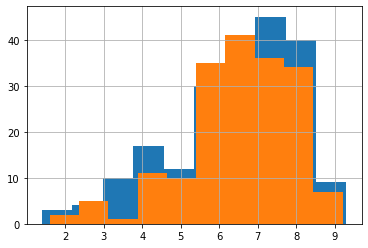

In [36]:
sample_2.hist()
sample_1.hist()

*разница в рейтингах небольшая*

мы принимаем тот факт, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы в соответствии с нашей нулевой гипотезой

In [37]:
alpha=0.5
#тк population в нашем случае получить невозможно, тестируем 2 samples
sample_3=df_actual.query('genre=="Action"')['user_score'].dropna()
sample_4=df_actual.query('genre=="Sports"')['user_score'].dropna()
results = st.ttest_ind(
    sample_3, 
    sample_4,
    equal_var = False )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


<AxesSubplot:>

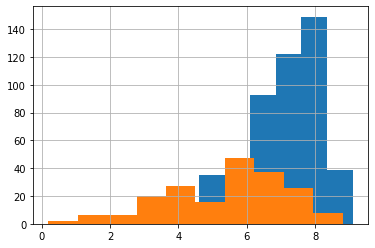

In [38]:
sample_3.hist()
sample_4.hist()

наглядно показана разница в рейтингах разных жанров

*На основании проведенного теста делаем вывод о том, что средние пользовательские рейтинги жанров Action и Sports разные, так как нулевая гипотеза была отвергнута при alpha = 0.05.*

**Главный вывод:**

Если опраться на те года, которые у нас есть, можно сказать, что выделются жанры как с самыми низкими продажами (Стратегии, приключения и головоломки), и с самыми высокими продажами (Экшн, Спорт, Боевики, Ролевые). И вероятнее всего в 2017м игры таких жанров: Экшн, Спорт, Боевики, Ролевые будут все еще популярны на мировом рынке и занимать большую долю, однако эти данные сильно варьируются от платформы к платформе, далее расскажу про медианные продажи на которые и сотоит делать основной акцент. Предположение о том, что рейтинг игры влияет на продажи, я не смогла ни подтвердить ни опровергнуть: по результатам исследования, уровень корреляции Пирсона достаточно низкий, где-то отрицательный, а где-ио небольшой положиетльный. В целом популярность компьютерных игр на платфрмах имеет тренд на снижение с 2008 года.

Говоря про платформы: текущие данные показывают на цикл популярности каждой из платформ примерно в течение 5 лет, от начала роста популярности и до спада. Можно предположить что в 2017 на такие платформы как XOne, 3DS and Ps4 придется значительная доля рынка. Остальные платформы показывают сильное снижение в продажах, есть верятность, что они пропадут в 2017.

На основании проведенного исследования был составлен портрет пользователя по каждому из представленных регионов
1. Европейцы: пользователи, выбирающие игры для взрослых (Это можно объяснить тем, что большинство игр-боевиков и в жанре экшн 18+), предпочитающие игры жанров Action, Shooter, Sports, Role-playing, Racing на платформах PS4,PS3, X360, Xone, 3DS
2. В Японии пользователи предпочтут Action, Role-playing (иры для всех) на плфтформах PS4,PS3,3DS, PSV, WiiU
3. В Северной Америке пользователи выберут игры для взрослых в жанре Action, Shooter, Sports, Role-playing, Misc, используя PS4,PS3,X360, XOne, 3DS

Если сравнивать медианные продажи по жанрам, тогда можно будет выделить жанры Shooter and Sports, где медианные продажи среди всех платформ были наивысшие (около 600 тыс), в то время как медианные продажи жанра Экшн сильно проигрывают данным жанрам. Згачит, наиболее sustainable option будут именно эти жанры.

Было проверено 2 гипотезы о средних пользовательских рейтингах:

•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

•	Средние пользовательские рейтинги жанров Action и Sports одинаковые.

- на основании статистических тестов, мы заключили, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы; а редние пользовательские рейтинги жанров Action и Sports разные на уровне статистической значимости 95%.

Значит, можно запстить рекламную компанию игр жанров Shooter and Sports на платформах XOne, 3DS and Ps4 в Европе и(или) Северной Америке.